In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important; }</style>"))

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [22]:
import seaborn as sns
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as plticker

def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
             # 'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in",
              'legend.fontsize': 20}
    mpl.rcParams.update(rcparams) 

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = '#3690c0'

stdrcparams(usetex=True)
figsize=stdfigsize(ratio=-1)
xs,ys=figsize

def custom_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x',length=10,direction='out')
    ax.tick_params(axis='x',which='minor',direction='out')
    ax.tick_params(axis='y',length=10,direction='out')
    ax.tick_params(axis='y',which='minor',direction='out')

In [23]:
import pickle
import itertools
import math
import random
import pandas as pd
import numpy as np
import networkx as nx

from datetime import date

In [24]:
data = pd.read_pickle('../results/us_air_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
# data['passenges_centrality'] = data['passenges_centrality'].astype(np.int64)
data = data[data.year>=date(2004,1,1)]
rename_dict = {}
for column in data.columns:
    if '_index' in column:
        column_v = column.replace('_index','',1)
    else:
        column_v =  column
    rename_dict[column]=column_v.replace('_',' ',3).title()
    
rename_again = {'Common Neighbor' : 'CN', 'Salton':'SA' , 'Jaccard':'JA', 'Sorensen':'SO', 'Hub Promoted':'HPI',
       'Hub Depressed':'HDI', 'Leicht Holme Newman':'LHNI', 'Preferential Attachment':'PA',
       'Adamic Adar':'AA', 'Resource Allocation':'RA', 'Local Path':'LP'}
    
data_air = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})

columns=['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
       'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
       'Adamic Adar', 'Resource Allocation', 'Local Path',
        'Year','Edge','Time','Label']

data_air =  data_air[columns]

In [25]:
data = pd.read_pickle('../results/brazil_bus_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
data_bus = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})
data_bus =  data_bus[columns]

In [26]:
def remove_outlier(df):
    var = ['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
       'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
       'Adamic Adar', 'Resource Allocation', 'Local Path']
    for c in var:
        q = df[c].quantile(0.95)
        df = df[df[c] < q]
    return df

In [8]:
# data_bus = remove_outlier(data_bus)
# data_air = remove_outlier(data_air)

In [9]:
# from sklearn.preprocessing import MinMaxScaler

# var = ['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
#        'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
#        'Adamic Adar', 'Resource Allocation', 'Local Path']

# # var = ['CN', 'SA', 'JA', 'SO', 'HPI',
# #        'HDI', 'LHNI', 'PA',
# #        'AA', 'RA', 'LP']

# data_to_plot = data_air[data_air.Year==date(2014,1,1)]
# scaler = MinMaxScaler()
# X = data_to_plot[var] 
# data_to_plot[var] = scaler.fit_transform(X)
# df_air = pd.melt(data_to_plot,value_vars=var, id_vars='Label')

# data_to_plot = data_bus[data_bus.Year==date(2014,1,1)]
# scaler = MinMaxScaler()
# X = data_to_plot[var] 
# data_to_plot[var] = scaler.fit_transform(X)
# df_bus = pd.melt(data_to_plot,value_vars=var, id_vars='Label')

# import matplotlib.transforms
# colors = ["black", "red"]

In [27]:
from scipy import stats

In [28]:
df=data_bus[data_bus.Year==date(2014,1,1)]
for v in var:
    rvs1=df[df.Label==0][v].values
    rvs2=df[df.Label==1][v].values
    print(stats.ks_2samp(rvs1, rvs2))

Ks_2sampResult(statistic=0.12190597793329666, pvalue=3.703544641484614e-14)
Ks_2sampResult(statistic=0.3463746668207457, pvalue=2.7378217891616343e-111)
Ks_2sampResult(statistic=0.31181820853709286, pvalue=2.849817175335291e-90)
Ks_2sampResult(statistic=0.31181820853709286, pvalue=2.849817175335291e-90)
Ks_2sampResult(statistic=0.20125719156190075, pvalue=7.460519732932516e-38)
Ks_2sampResult(statistic=0.2767960062353032, pvalue=3.1898223685268866e-71)
Ks_2sampResult(statistic=0.28780731479174504, pvalue=5.739973564062357e-77)
Ks_2sampResult(statistic=0.12373917355290942, pvalue=1.4206991981815323e-14)
Ks_2sampResult(statistic=0.14974942114592504, pvalue=3.795301325394187e-21)
Ks_2sampResult(statistic=0.15400424073649788, pvalue=2.426523838587046e-22)
Ks_2sampResult(statistic=0.08584919713012179, pvalue=3.095151683189269e-07)


In [29]:
df=data_air[data_air.Year==date(2014,1,1)]
for v in var:
    rvs1=df[df.Label==0][v].values
    rvs2=df[df.Label==1][v].values
    print(stats.ks_2samp(rvs1, rvs2))

Ks_2sampResult(statistic=0.15666097482103503, pvalue=1.982313337523283e-27)
Ks_2sampResult(statistic=0.10862090429458393, pvalue=2.0861585092081924e-13)
Ks_2sampResult(statistic=0.09255294180415563, pvalue=7.515524672996184e-10)
Ks_2sampResult(statistic=0.09255294180415563, pvalue=7.515524672996184e-10)
Ks_2sampResult(statistic=0.24252510043807257, pvalue=3.838429696896629e-65)
Ks_2sampResult(statistic=0.05935596395125475, pvalue=0.0002658224172893095)
Ks_2sampResult(statistic=0.17744694046807058, pvalue=4.528766939612229e-35)
Ks_2sampResult(statistic=0.16116118159609305, pvalue=5.290253086393134e-29)
Ks_2sampResult(statistic=0.15825906672935464, pvalue=5.539006796102767e-28)
Ks_2sampResult(statistic=0.1984232744302038, pvalue=9.57054008135798e-44)
Ks_2sampResult(statistic=0.16244742014612767, pvalue=1.8428808791454444e-29)


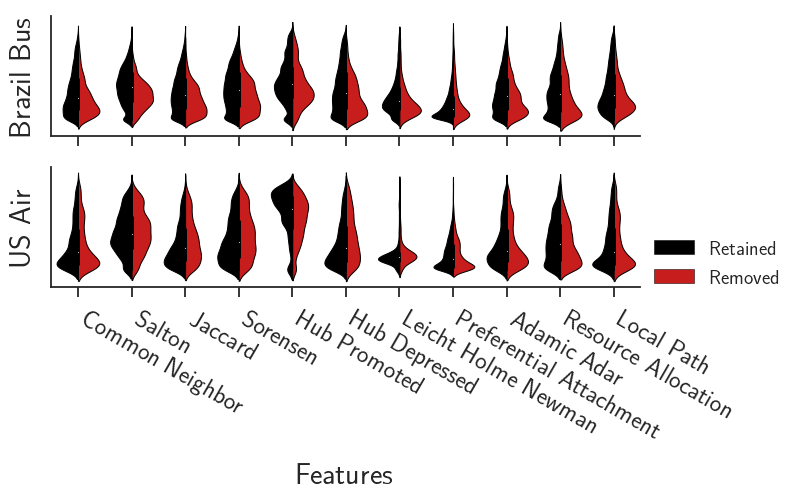

In [25]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(xs,ys))

g = sns.violinplot(x='variable', y='value', hue='Label', palette=sns.xkcd_palette(colors),split=True , data=df_bus,ax=ax[0],linewidth=1)
custom_frame(ax[0])
g = sns.violinplot(x='variable', y='value', hue='Label', palette=sns.xkcd_palette(colors),split=True ,data=df_air,ax=ax[1],linewidth=1)
custom_frame(ax[1])
ax[0].set_xlabel('')
ax[1].set_xlabel("Features")
ax[0].set_ylabel('Brazil Bus')
ax[1].set_ylabel('US Air')
ax[0].set_yticks([])
ax[1].set_yticks([])
plt.xticks(rotation=-30,ha='left',ma='right')
# ax[0].legend(bbox_to_anchor=(1.0, 1))
legend = ax[1].legend(bbox_to_anchor=(1.27, 0.55),framealpha=0)
for t, l in zip(legend.texts,("Retained", "Removed")):
    t.set_text(l)
ax[0].get_legend().remove()
plt.tight_layout()
plt.savefig('../Figs/Fig.2B_withouttop95.pdf',transparent=True)
plt.show()

In [26]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [27]:
def time_spilt(data,edge_train,edge_test,f_train_t=0.7):
    df = data
    year = list(df.Year.unique())
    year = year[int(f_train_t*len(year))]
    df_00 = df[df.Year <= year].loc[df['Edge'].isin(edge_train)].drop(columns = ['Time','Year','Edge'])
    df_11 = df[df.Year > year].loc[df['Edge'].isin(edge_test)].drop(columns = ['Time','Year','Edge'])
    df_01 = df[df.Year <= year].loc[df['Edge'].isin(edge_test)].drop(columns = ['Time','Year','Edge'])
    df_10 = df[df.Year > year].loc[df['Edge'].isin(edge_train)].drop(columns = ['Time','Year','Edge'])
    return(df_00,df_01,df_10,df_11)

def edges_split(data,f_train_e=0.7,seed=30):
    edges = list(data.Edge.unique())
    random.seed(seed)
    edge_train = random.sample(edges,int(f_train_e*len(edges)))
    edge_test = [e for e in edges if e not in edge_train]
    return(edge_train,edge_test)


def df_to_XY(df):
    '''
    split DataFrame into X and y
    ----- 
    Input:
        Pandas DataFrame
    Output:
        X,y - numpy array
    '''
    if 'Year' in df.columns: 
        df = df.drop(columns = ['Year','Edge'])
    X,y = df.loc[:, df.columns != 'Label'].to_numpy(),\
    df.loc[:, df.columns == 'Label'].to_numpy()
    return(X,y)

def plot_confusion_matrix(X,y,model,Norm = True,return_cm= False, ax = None):
    '''
    plot confusion matrix
    ----- 
    Input:
        ax - matplotlib ax
        X - numpy array
        y - numpy array
        model - Sklearn model
        Norm - bool no
    
    Output:
        None
    '''
    y_predict = model.predict(X)    
    cm = confusion_matrix(y,y_predict,labels = [0,1])
    
#     print('confusion matrix before normalized: \n %s' %cm)
#     print('balanced accuracy score: %s' %balanced_accuracy_score(y,y_predict))
    if Norm:
        cm = cm.astype('float') / cm.sum(axis = 1)[:,None]
    else:
        cm = cm/cm.sum()    
    classes = ['Retained','Removed']
    #classes = [0,1]
    sns.heatmap(cm, square = True, annot= True, cbar = False, cmap=plt.cm.Blues,ax = ax,annot_kws={"fontsize":25})
    ax.set_ylim(0,2)
    ax.tick_params( bottom=False, right=False,left=False, labeltop=False, labelbottom=True)
    ax.invert_yaxis()
    ax.set(xticks = np.arange(cm.shape[1])+0.5,
           yticks = np.arange(cm.shape[0])+0.25,
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel = 'True label',
           xlabel = 'Predicted label') 
    if return_cm:
        return(cm)

In [28]:
weight=None
classifiers = {'ExtraTreeClassifier': ExtraTreeClassifier(class_weight=weight),
             'DecisionTreeClassifier': DecisionTreeClassifier(class_weight=weight),
             'MLPClassifier': MLPClassifier(),
    #         'RadiusNeighborsClassifier': RadiusNeighborsClassifier(),
             'KNeighborsClassifier': KNeighborsClassifier(),
             'SGDClassifier': SGDClassifier(class_weight=weight),
             'RidgeClassifierCV': RidgeClassifierCV(class_weight=weight),
             'RidgeClassifier': RidgeClassifier(class_weight=weight),
             'PassiveAggressiveClassifier': PassiveAggressiveClassifier(class_weight=weight), 
             #'GaussianProcessClassifier': GaussianProcessClassifier(),
             'AdaBoostClassifier': AdaBoostClassifier(),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'BaggingClassifier': BaggingClassifier(),
             'RandomForestClassifier': RandomForestClassifier(class_weight=weight),
             'BernoulliNB': BernoulliNB(),
             'CalibratedClassifierCV': CalibratedClassifierCV(),
             'GaussianNB': GaussianNB(),
             'LabelPropagation': LabelPropagation(),
             'LabelSpreading':  LabelSpreading(),
             'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
             'LinearSVC': LinearSVC(class_weight=weight),
             'LogisticRegression':LogisticRegression(class_weight=weight),
             'LogisticRegressionCV': LogisticRegressionCV(class_weight=weight),
             'MultinomialNB': MultinomialNB(),
             'NearestCentroid': NearestCentroid(),
             'NuSVC': NuSVC(class_weight=weight),
             'Perceptron': Perceptron(class_weight=weight),
#              'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
             'SVC': SVC(class_weight=weight),
 #            'GaussianMixture': GaussianMixture(),
             'XGBClassifier': XGBClassifier()}
#             'XGBRFClassifier':  XGBRFClassifier()}

def model_selection(classifiers,X_resampled,y_resampled):
    models = []
    cv_scores = []
    # iterate over classifiers
    for name, clf in classifiers.items():
#     try:        
        cv_scores.append(cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring='accuracy', n_jobs =-1))
        clf.fit(X_resampled, y_resampled)
        models.append(clf)
#         except:
#             cv_scores.append(np.nan)
#             print(name)
#             pass
    return(models,cv_scores)

In [29]:
t0_air = date(2004,1,1)
t1_air = date(2004,2,1)
data = data_air 
df_air_00,df_air_01,df_air_10,df_air_11 = time_spilt(data[data.Year>=t0_air][data.Year<=t1_air],*edges_split(data,seed=1231),f_train_t=0.45)

print('Train:\n',df_air_00.Label.value_counts())
print('Test10:\n',df_air_10.Label.value_counts())
print('Test01:\n',df_air_01.Label.value_counts())
print('Test11:\n',df_air_11.Label.value_counts())

Train:
 0    1727
1     866
Name: Label, dtype: int64
Test10:
 0    1773
1     730
Name: Label, dtype: int64
Test01:
 0    719
1    377
Name: Label, dtype: int64
Test11:
 0    748
1    302
Name: Label, dtype: int64


In [30]:
t0_bus = date(2005,1,1)
t1_bus = date(2005,2,1)
data = data_bus 
df_bus_00,df_bus_01,df_bus_10,df_bus_11 = time_spilt(data[data.Year>=t0_bus][data.Year<=t1_bus],*edges_split(data,seed=2226),f_train_t=0.49)

print('Train:\n',df_bus_00.Label.value_counts())
print('Test10:\n',df_bus_10.Label.value_counts())
print('Test01:\n',df_bus_01.Label.value_counts())
print('Test11:\n',df_bus_11.Label.value_counts())

Train:
 0    7639
1     162
Name: Label, dtype: int64
Test10:
 0    7618
1     118
Name: Label, dtype: int64
Test01:
 0    3207
1      73
Name: Label, dtype: int64
Test11:
 0    3196
1      46
Name: Label, dtype: int64


In [31]:
X_air_train,y_air_train = df_to_XY(df_air_00)
X_air_test01,y_air_test01 = df_to_XY(df_air_01)
X_air_test10,y_air_test10 = df_to_XY(df_air_10)
X_air_test11,y_air_test11 = df_to_XY(df_air_11)
# Resampling Trainning
ros = RandomUnderSampler(random_state=40)
X_air_resampled, y_air_resampled = ros.fit_resample(X_air_train,y_air_train)
# For Null Model
y_air_train_shuffled = np.copy(y_air_train)
np.random.seed(40)
np.random.shuffle(y_air_train_shuffled)
ros = RandomUnderSampler()
Xnull_air_resampled, ynull_air_resampled = ros.fit_resample(X_air_train,y_air_train_shuffled)

In [32]:
models_air,cv_scores_air = model_selection(classifiers,X_air_resampled,y_air_resampled)

/home/weihua/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/weihua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/weihua/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/weihua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:1806: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

In [33]:
score_mean_air = [s.mean() for s in cv_scores_air]
sorted_names_air = [name for _,name in sorted(zip(score_mean_air,classifiers.keys()))]
sorted_scores_air = sorted(cv_scores_air,key = lambda x: x.mean())
sorted_models_air = [model for _,model in sorted(zip(score_mean_air,models_air), key=lambda x: x[0])]

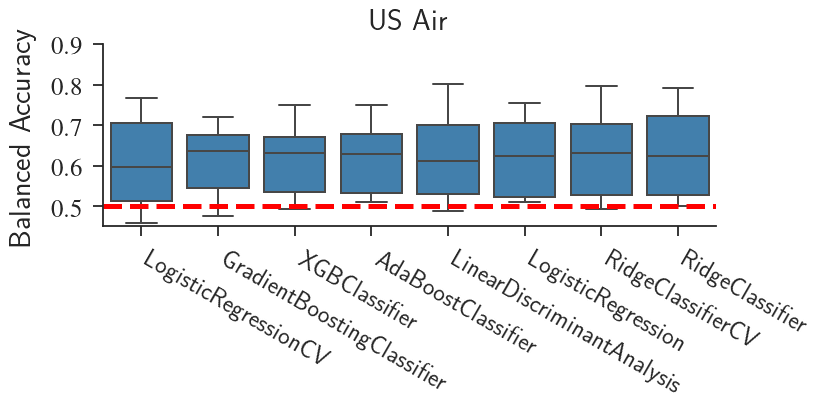

In [34]:
top = 8
fig,ax = plt.subplots(figsize=(xs,ys*0.8))
sns.boxplot(x= sorted_names_air[-top::],y=sorted_scores_air[-top::],color='#3182bd',linewidth=2
            ,showfliers=False,ax=ax)
plt.title('US Air')
plt.xticks(rotation=-30,ha='left',ma='right')
# plt.yticks(fontsize=20)
plt.ylim(0.45,0.90)
ax.set_ylabel('Balanced Accuracy')
plt.tight_layout()
plt.yticks([0.5,0.6,0.7,0.8,0.9])
ax.axhline(y=0.5, linestyle = '--',color ='r')
custom_frame(ax)
plt.savefig('../Figs/model_selection_air_top.pdf',transparent=True)

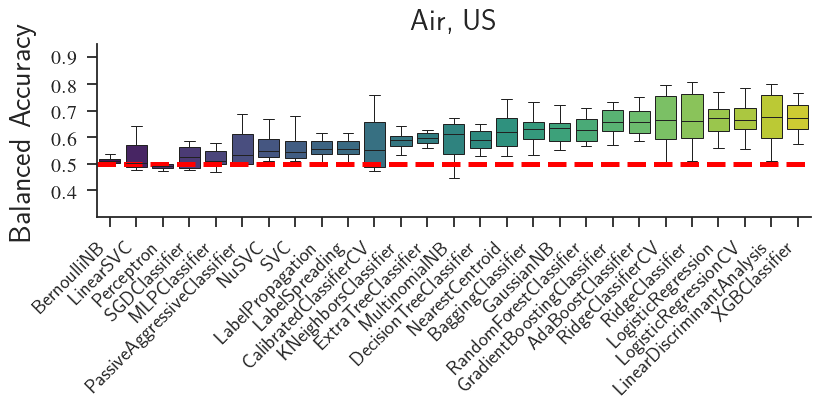

In [56]:
fig,ax = plt.subplots(figsize=(xs,ys*0.8))
sns.boxplot(x= sorted_names_air,y=sorted_scores_air,palette='viridis',linewidth=1,showfliers=False,ax=ax)
plt.title('Air, US')
plt.xticks(rotation=45,fontsize=20,ha='right')
plt.yticks(fontsize=20)
plt.ylim(0.3,0.95)
ax.set_ylabel('Balanced Accuracy')
plt.tight_layout()
plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9])
ax.axhline(y=0.5, linestyle = '--',color ='r')
custom_frame(ax)
plt.savefig('../Figs/model_selection_air_all.pdf',transparent=True)
plt.show()

In [78]:
X_bus_train,y_bus_train = df_to_XY(df_bus_00)
X_bus_test01,y_bus_test01 = df_to_XY(df_bus_01)
X_bus_test10,y_bus_test10 = df_to_XY(df_bus_10)
X_bus_test11,y_bus_test11 = df_to_XY(df_bus_11)
# Resampling Trainning
ros = RandomUnderSampler(random_state=2020)
X_bus_resampled, y_bus_resampled = ros.fit_resample(X_bus_train,y_bus_train)
# For Null Model
y_bus_train_shuffled = np.copy(y_bus_train)
np.random.seed(40)
np.random.shuffle(y_bus_train_shuffled)
ros = RandomUnderSampler()
Xnull_bus_resampled, ynull_bus_resampled = ros.fit_resample(X_bus_train,y_bus_train_shuffled)

In [79]:
models_bus,cv_scores_bus = model_selection(classifiers,X_bus_resampled,y_bus_resampled)

In [80]:
score_mean_bus = [s.mean() for s in cv_scores_bus]
sorted_names_bus = [name for _,name in sorted(zip(score_mean_bus,classifiers.keys()))]
sorted_scores_bus = sorted(cv_scores_bus,key = lambda x: x.mean())
sorted_models_bus = [model for _,model in sorted(zip(score_mean_bus,models_bus), key=lambda x: x[0])]

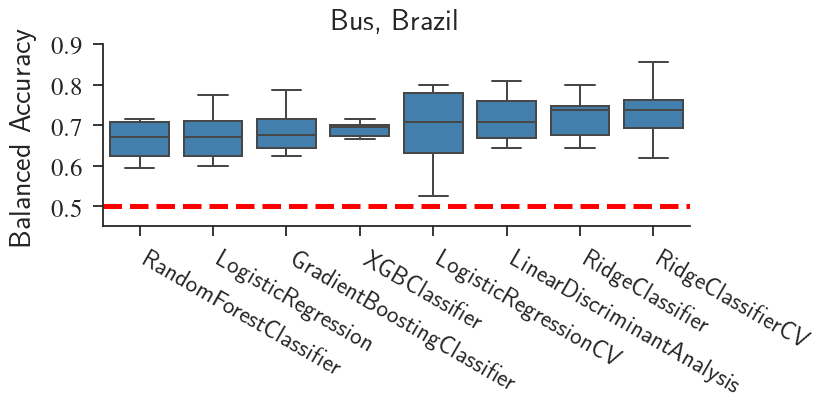

In [89]:
top = 8
fig,ax = plt.subplots(figsize=(xs*1,ys*0.8))
sns.boxplot(x= sorted_names_bus[-top::],y=sorted_scores_bus[-top::],color='#3182bd',linewidth=2,showfliers=False,ax=ax)
plt.title('Bus, Brazil')
plt.xticks(rotation=-30,ha='left',ma='right')
# plt.yticks(fontsize=20)
plt.ylim(0.45,0.9)
plt.yticks([0.5,0.6,0.7,0.8,0.9])
ax.set_ylabel('Balanced Accuracy')
plt.tight_layout()
ax.axhline(y=0.5, linestyle = '--',color ='r')
custom_frame(ax)
plt.savefig('../Figs/model_selection_bus_top.pdf',transparent=True)

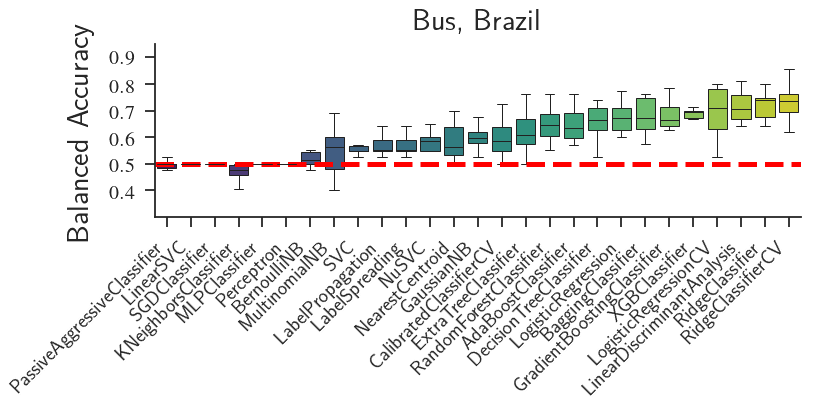

In [61]:
fig,ax = plt.subplots(figsize=(xs*1,ys*0.8))
sns.boxplot(x= sorted_names_bus,y=sorted_scores_bus,palette='viridis',linewidth=1,showfliers=False,ax=ax)
plt.title('Bus, Brazil')
plt.xticks(rotation=45,fontsize=20,ha='right')
plt.yticks(fontsize=20)
plt.ylim(0.3,0.95)
plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_ylabel('Balanced Accuracy')
plt.tight_layout()
ax.axhline(y=0.5, linestyle = '--',color ='r')
custom_frame(ax)
plt.savefig('../Figs/model_selection_bus_all.pdf',transparent=True)